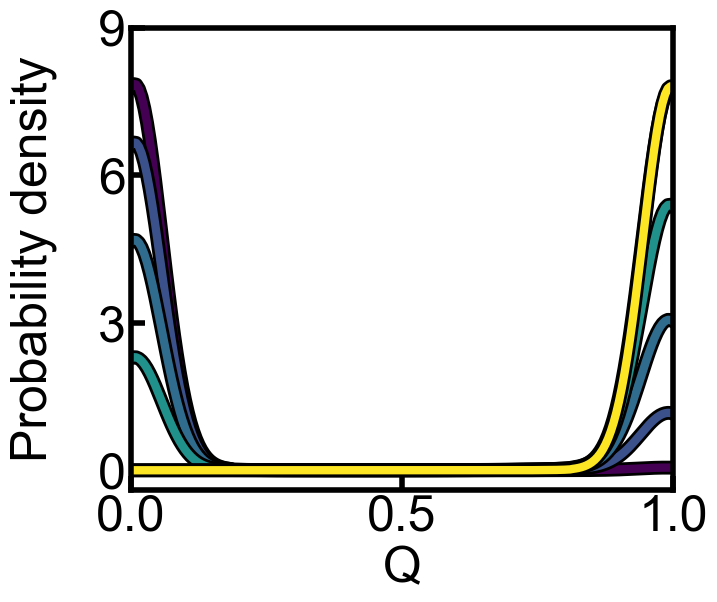

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.patheffects as PathEffects

# Load data from files
data_0_3 = np.loadtxt('0.3_histo/histo_1')
data_0_35 = np.loadtxt('0.35_histo/histo_1')
data_0_37 = np.loadtxt('0.37_histo/histo_1')
data_0_4 = np.loadtxt('0.4_histo/histo_1')
data_0_45 = np.loadtxt('0.45_histo/histo_1')
data_0_5 = np.loadtxt('0.5_histo/histo_1')

# Combine all data into a list for easier processing
all_data = [data_0_3, data_0_35, data_0_37, data_0_4, data_0_45, data_0_5]
epsilons = [0.3, 0.35, 0.37, 0.4, 0.45, 0.5]  # Corresponding epsilon values

# Update plotting style
plt.rcParams.update({
    'font.family': 'Arial',  # 设置字体
    'axes.titlesize': 36,  # 标题字体大小
    'axes.labelsize': 36,  # 坐标轴标签字体大小
    'xtick.labelsize': 36,  # X轴刻度字体大小
    'ytick.labelsize': 36,  # Y轴刻度字体大小
    'legend.fontsize': 36,  # 图例字体大小
    'figure.figsize': (7, 6),  # 图像大小
    'axes.linewidth': 4,  # 坐标轴线宽
    'xtick.major.size': 10, # x 轴主刻度长度
    'ytick.major.size': 10, # y 轴主刻度长度
    'xtick.minor.size': 5, # x 轴次刻度长度
    'ytick.minor.size': 5, # y 轴主刻度长度
    'xtick.major.width': 4, # x 轴主刻度线宽
    'ytick.major.width': 4, # y 轴主刻度线宽
    'xtick.minor.width': 4, # x 轴次刻度线宽
    'ytick.minor.width': 4, # y 轴主刻度线宽
    'legend.fontsize': 32,    # 图例字体大小
    'axes.grid': False,  # 关闭背景网格
})

# Normalize epsilon values for color mapping
norm = mcolors.Normalize(vmin=min(epsilons), vmax=max(epsilons))
cmap = plt.get_cmap('viridis')

# Plot lines with gradient colors and black border
lines = []
for data, epsilon in zip(all_data, epsilons):
    color = cmap(norm(epsilon))
    line, = plt.plot(data[:, 0], data[:, 1], label=fr'$\epsilon_\text{{LB}}$ = {epsilon}', 
                     color=color, linewidth=6)  # Increase the line width
    line.set_path_effects([PathEffects.Stroke(linewidth=10, foreground='black'), PathEffects.Normal()])
    lines.append(line)

# Customize legend to show only text with colors matching the lines
#legend_labels = [fr'$\epsilon_\text{{LB}}$ = {epsilon}' for epsilon in epsilons]
#legend = plt.legend(lines, legend_labels, frameon=False, handlelength=0, handletextpad=0)

#for text, epsilon in zip(legend.get_texts(), epsilons):
#    color = cmap(norm(epsilon))
#    text.set_color(color)

# Axis settings
plt.tick_params(axis='x', which='both', direction='in')
plt.tick_params(axis='y', which='both', direction='in')

plt.xticks(np.arange(0, 1.1, 0.5), rotation=0)
plt.yticks(np.arange(0, 10, 3), rotation=0)

# Set axis labels
plt.xlabel('Q')
plt.xlim(0, 1)
plt.ylabel('Probability density', labelpad=30)
plt.savefig("Q-Probability-density", dpi=300, bbox_inches='tight')

# Show plot
plt.show()